In [6]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
#drop columns 
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [11]:
df.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)


In [12]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Text(0, 0.5, 'Number of Data points')

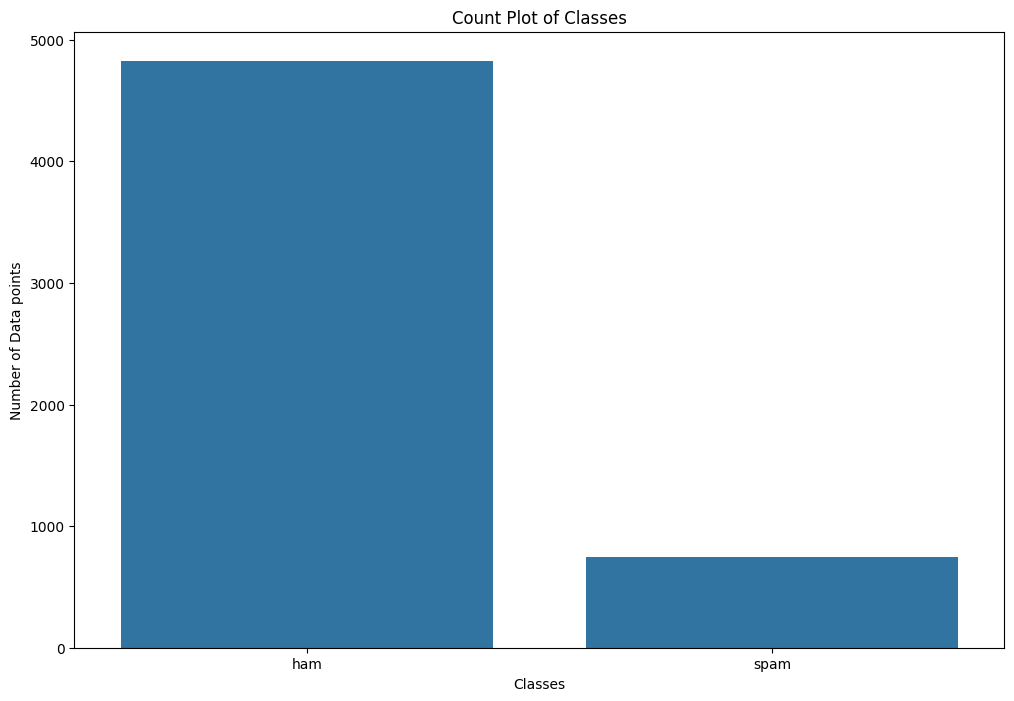

In [13]:
plt.figure(figsize=(12,8))
fg = sns.countplot(x= df["Target"])
fg.set_title("Count Plot of Classes")
fg.set_xlabel("Classes")
fg.set_ylabel("Number of df points")

In [14]:
import nltk
from nltk import word_tokenize, sent_tokenize

# Download the Punkt tokenizer used by nltk.word_tokenize() and nltk.sent_tokenize()
nltk.download('punkt')

# Apply the tokenization functions to the entire dfframe using the 'applymap' function
df[['No_of_Words', 'No_of_sentences']] = df['Text'].applymap(lambda x: [word_tokenize(x), sent_tokenize(x)]).apply(lambda x: [len(x[0]), len(x[1])], axis=1, result_type='expand')

# Calculate the number of characters using the 'apply' function
df["No_of_Characters"] = df["Text"].apply(len)

# Display the descriptive statistics of the dfframe
df.describe().T

ModuleNotFoundError: No module named 'nltk'

In [ ]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(df=df, hue="Target",palette="husl")
plt.show(fg)

In [ ]:
print("{}\n{}\n{}\n{}\n{}".format(*df.head()["Text"]))

NameError: name 'df' is not defined

In [ ]:
import re

def Clean(Text):
    return ' '.join(re.sub('[^a-zA-Z]', ' ', Text.lower()).split())

df["Clean_Text"] = df["Text"].apply(Clean)

print("\033[1m\u001b[45;1m The First 5 Texts after cleaning:\033[0m", *df["Clean_Text"][:5], sep = "\n")



In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

df["Tokenize_Text"] = df["Clean_Text"].apply(nltk.word_tokenize)

print("\033[1m\u001b[45;1m The First 5 Texts after Tokenizing:\033[0m", *df["Tokenize_Text"][:5], sep = "\n")

stop_words = set(stopwords.words("english"))

df["Nostopword_Text"] = df["Tokenize_Text"].apply(lambda x: [word for word in x if word.lower() not in stop_words])

print("\033[1m\u001b[45;1m The First 5 Texts after removing the stopwords:\033[0m", *df["Nostopword_Text"][:5], sep = "\n")

In [ ]:
corpus = [' '.join(i) for i in df["Lemmatized_Text"]]

print("\033[1m\u001b[45;1m The First 5 lines in corpus :\033[0m", *corpus[:5], sep = "\n")

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()

print("Feature type: ", X.dtype)

label_encoder = LabelEncoder()
df["Target"] = label_encoder.fit_transform(df["Target"])

In [ ]:
#train and evaluate model

X=df.drop("Target", axis=1)
y=df["Target"]

#split df into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df["Target"], test_size=0.2, random_state=42)
#train All models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


models = [LogisticRegression(), RandomForestClassifier(), SVC(), MultinomialNB(), DecisionTreeClassifier(), KNeighborsClassifier()]


for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n\n")




